# Team : Hajar Sadeghi, Tania Ghafourian, Pranav Vijay Chakilam.

# Question 1

## 1.1 Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

- First we used the info() method to examine the data. We noticed that the dataframe has 4600 entries and 18 columns or attributes. On observing the attributes’ data types, we found that 4 of the attributes had float64 as their data type, 9 had int64 as their data type, and 5 attributes had object as their data type. Furthermore, we saw that no attributes had null values since all of them had 4600 as their non-null count

- Using the info() method we observed that the following 13 attributes are continuous valued as they had float64 or int64 as their data type: 
price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above and sqft_basement

- Additionally, we found that the following 5 attributes have object as their data type and might be of categorical data: 
date, street, city, statezip and country. 

- Furthermore, after checking the value counts for all the variables we found that the attributes - bedrooms, bathrooms, waterfront, view, condition could be considered as ordinal categorical variables even though they have numerical values as they only have a set of finite discrete possible values.

In [740]:
#Imports 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from pandas.plotting import scatter_matrix

In [741]:
#Read the data
housing_csv_path = 'Datasets\housing_data.csv'
housing_df = pd.read_csv(housing_csv_path)
housing_df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [742]:
#Checking the dimensions of the data frame.
housing_df.shape

(4600, 18)

In [743]:
#Examine the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [744]:
#Check the value counts for each attribute
for attribute in housing_df.columns:
        print(attribute,'!!!')
        print(housing_df[attribute].value_counts())
        print('-'*20)

date !!!
2014-06-23 00:00:00    142
2014-06-26 00:00:00    131
2014-06-25 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-05-03 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64
--------------------
price !!!
0.0         49
300000.0    42
400000.0    31
450000.0    29
440000.0    29
            ..
334500.0     1
189650.0     1
406500.0     1
833000.0     1
368112.5     1
Name: price, Length: 1741, dtype: int64
--------------------
bedrooms !!!
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64
--------------------
bathrooms !!!
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75    

In [745]:
housing_df['waterfront'].value_counts()
#This could be considered to be a binary categorical variable, and we assume that it could be respresntative of whether a house has a view to a waterfront or not.

0    4567
1      33
Name: waterfront, dtype: int64

In [746]:
housing_df['view'].value_counts()
#Even this variable takes 5 integer values between 0 and 4 (including 0 and 4) and can be considered to be an ordinal categorical variable. But we do not know what this represents and assume that its a rating of the view the building offers.

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [747]:
housing_df['bedrooms'].value_counts()
#This variable takes integer values from 0 to 9. If we assume that the maximum number of bedrooms in this location cannot exceed 9 due to somme regulations, then this variables could be considered as categorical variable that can only take these discrete set of values.

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [748]:
housing_df['bathrooms'].value_counts()
#Similar to the bedrooms variable this variable takes values from 1 to 9. If we assume that the maximum number of variables in this location cannot exceed 9 due to somme regulations, then this variables could be considered as categorical variableIf we assume that the maximum number of bathrooms in this location cannot exceed 8 due to some regulations and it can only take these discrete set of values.

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
6.50       1
6.75       1
5.75       1
8.00       1
Name: bathrooms, dtype: int64

In [749]:
housing_df['condition'].value_counts()
#Even this variable has a fixed set of possible discrete integer values from 1 to 5. Therefore, we could consider to be an ordinal categorical variable where a higher value means better condition.

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [750]:
housing_df['floors'].value_counts()
#Even this variable has a finite of values it can take. Therefore, we could consider to be an ordinal categorical variable if we assume that houses in this location, due to some municipal or other regulations are allowed to have a number of floors which is equal to one of these values.

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

## 1.2 • Display the statistical values for each of the attributes, along with visualizations (e.g. histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? How is the data distributed for each feature/attribute? What bad data problems could be present?

We used describe() and hist() methods to check for the statistical values of the attributes. Each of the attributes has a different scale, so one general treatment for all of them is feature scaling.

- price: 
It is in tens of millions of dollars and does not have a bell-shaped normal distribution. The minimum value is 0, which is not reasonable. So, we have to either contact the provider of the data to get more accurate values for the price attribute or keep in mind that we have if the outcome for a specific data was 0, it does not mean that the house is free, it is either an error in recording the data or there were some values less than 1 million and were recorded as 0. In addition, we see in the histogram that the data is skewed to the right. Since there is not much visible data there, we can either treat them as the outliers and remove those rows or split the whole dataset into two sets based on a threshold in the price attribute, and then train separate models for the outliers and the rest of the data. Another treatment can be replacing those outliers at a price with the median value. We can consider all these scenarios and run the regression model for each, compare the results, and choose the most significant one.

- bedrooms: 
It has a quite normal bell-shaped distribution. As this attribute has discrete values, it does not have continuous values, but at the same time, it makes more sense if we consider it as ordinal categorical variable. In either case we would use the variables numerical value directly or after scaling in the regression model as it would be considered as an ordinal categorical variable and it would let us avoid one-hot encoding the variable which has its own disadvantages.

- bathrooms: 
The distribution is not normal. We see two peaks, there are more houses with 2.5 bathrooms followed by 1 bathroom houses. There are two records for 0 bathrooms, which can most probably indicate an error in recording the data, and since they are just two rows in whole 6400 rows, we could remove these. 

- sqft_lot:
The values of sqft_lot are capped in the minimum, which could be an error in recording the data and cause a problem to the model as it could not learn enough be able to predict information about houses which have smaller sqft_lots. If it is not showing any correlation with the target variable we could drop this attribute. Furthermore, we can transform it or combine it with one of the other attributes to gain additional insights.

- floors: 
It could be considered as an ordinal categorical variable if houses in that location are mandated by regulations to only have a certain number of floors based on the area or soil type etc. Most houses have 1 floor, and there are two outliers with 3.5 floors. Data is not normally distributed, and we see to peaks. 

- waterfront: 
It has a binary value of 0 or 1. It is very imbalanced; less than 1 percent of the houses have the value of one for woterfront. Most probably these houses are among the ones that are very high in price. This could be a binary categorical variable which represents whether a house has a view to a waterfront or not.

- view: 
It is not normally distributed. More than 90% percent of the houses have 0 value for the view. To know about what view means in this dataset we have to check with the data provider.

- condition: 
The distribution resembles a half-normal distribution on the right side, and almost 99% percent of the data has a value of 3 or higher. So, we can say that our model is not going to be a good predictor for the houses which are not in good condition. To compensate for this lack of data,we have three solutions in mind: first, removing those rows; second, gathering more data about the houses with conditions 1 or 2; third is performing data augmentation by duplicating the rows with 1 or 2 as the condition value.

- sqft_above:
It looks like it has a normal distribution skewed to the right. We believe that most of the houses that have very high value in sqft_above should be in the same rows as the ones we talked about earlier, those with very high prices. Therefore, they are going to be in the same data set with high-priced ones, and after this separation, if there were only a few left in the other data set, wecan consider them as outliers and either remove them or replace their values with the median or mean of the data set they belong to. 

- sqft_basement: 
2745 houses out of 4600 do not have any basement, which results in having a pick on the left side of the histogram. If we do not consider the ones with 0 value for the basement, we see that the rest of the data has an almost normal distribution. 

- sqft_living:
We noticed that the shape of the histogram for sqft_above and sqft_living are almost the same. So, taking a closer look, we saw that sqft_living is equal to the sum of sqft_above and  sqft_basement. So, we are thinking of keeping sqft_above and 
sqft_basement and then dropping the sqft_living attribute. Or dropping one of these variables as it would be redundant information.

- yr_built:
The distribution of this attribute is not normal. We see that the maximum value of it is 2014. So, if we want to use our model for predicting the price of a house that is built later than 2014, we might face a problem. Thus, we decided to transform the data from the year of build to the age of the house, by subtracting the value from the reference point of 2014. Seventy-five percentquartile is 1997, so most of the houses are old and built at least 15 years ago.

- yr_renovated: 
 It is not normally distributed. Here we have the year of renovation; we can transform this attribute by subtracting the value from the reference point of 2014. So, we can understand how many years have been passed since the renovation. One point here is that we have 0 as the value for some of the data, which means that they were never renovated, so for these rows, we can consider the age of the house, which is going to be 2014 minus yr_renovated.

In [751]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


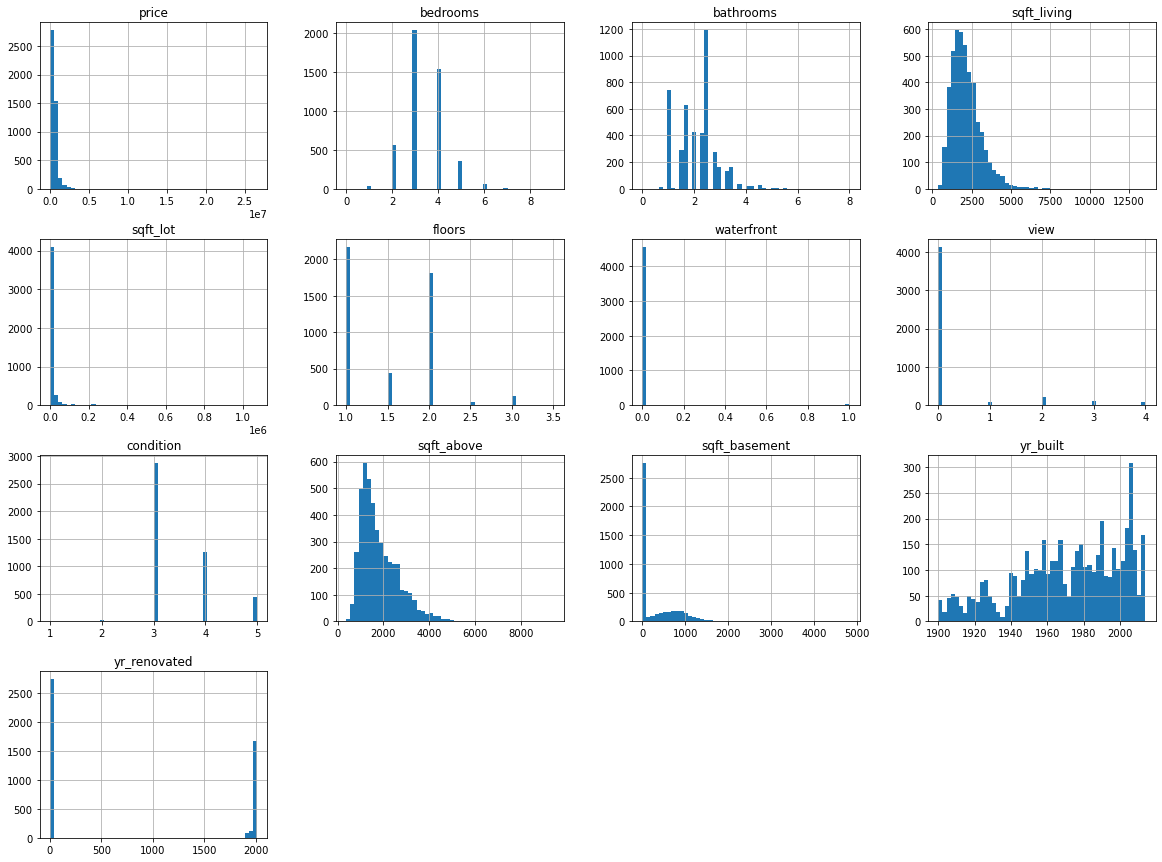

In [752]:
# import matplotlib.pyplot as plt
%matplotlib inline 
housing_df.hist(bins=50, figsize=(20,15))
plt.show()


## 1.3  Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.


The correlation between sqft_living and sqft_ above is 0.87 and strong. There is a moderate correlation between every two pair attributes amongst bedrooms, bathrooms,  and sqft_living. For the rest of the attributes, there is no significant correlation. However, two noticeable correlations remain. One is 0.39 between yr_built and condition. The second one is the -0.39 correlation between sqft_above and yr_built, and the non-significant negative correlation between yr_built and sqft_living, which indicates that less of the recently built houses have a basement.

The correlation between the price and none of the values is greater than |0.8|, so there is no strong predictor of the price value right now. However, as the correlation between price and sqft_living attribute is less than |0.8| and greater than |0.4|, it can moderately aid in predicting the values of price. The rest of the attributes are weak predictors of the price, for their correlation with the price is less than |0.4|. However, at the same time, we can see that sqft_lot, condition, yr_built, and yr_renovated do not show even noticeable weak correlation, as we also predicted before, and they need to be transformed. 
The above claims can also be supported by the scatter plot. The data in most of the plots is very scattered, which means that they cannot be helpful in predicting the price value.

In [753]:
correlation_matrix = housing_df.corr()
correlation_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [754]:
correlation_matrix['price']

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

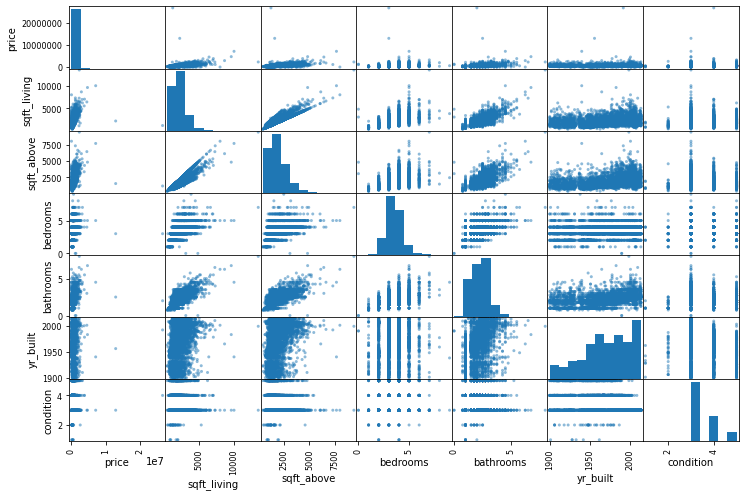

In [755]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'sqft_living', 'sqft_above', 'bedrooms', 'bathrooms', 'yr_built', 'condition']
scatter_matrix(housing_df[attributes], figsize= (12,8))
plt.show()

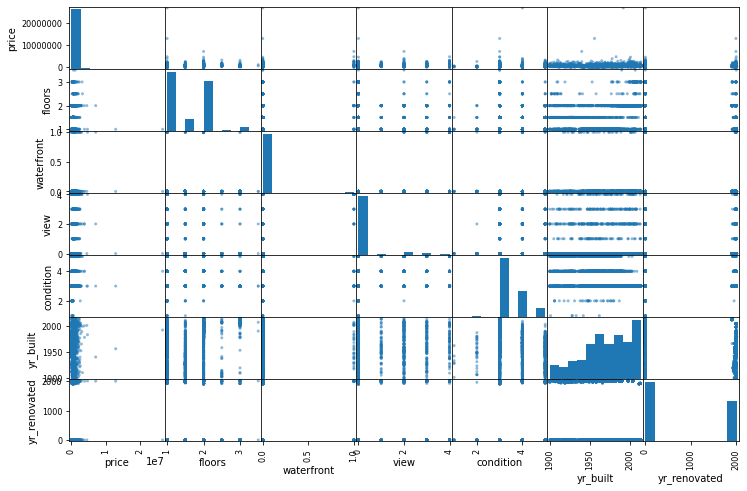

In [756]:
attributes = ['price', 'floors','waterfront', 'view','condition','yr_built','yr_renovated']
scatter_matrix(housing_df[attributes], figsize= (12,8))
plt.show()

## 1.4 What attributes could be removed from the data, since they may not be useful for predicting the housing price. Why?

- Date is an object. All the data was recorded in 2014, and this attribute does not provide any meaningful insight to predict the price. 
- The only country in the data is USA, so can we drop that too.
- We see that for street there are 1-4 houses in each street, so this attribute cannot help uswith predicting the price.
- We have both city and statezip here, we can drop the city and keep the statezip. As we have 44 distinct values for the city and 77 instances for the statezip. Also, the distribution for the statezip is more balanced relative to the city attribute.
- sqft_living is equal to the sum of sqft_above and sqft_basement. So, we can remove one of them or both sqft_above and sqft.
- There is a very low correlation between sqft_lot, condition, yr_built and yr_renovated and any of the other attributes or the target variable, so they could be dropped and we decided to run the model separately with and without them.
- We explored the option of combining a few attributes to create more meaningful attributes like yr_renovated and yr_built but it produced no noticeable change.
- In the end we decided to automate the process by setting a drop threshold of 0.1 and dropping attributes which had a correlation that is less than 0.1 with our target variable price, as they showed no predicting value.

In [757]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [758]:
#Outlier Treatment For Price Remove The Data Points which have price that is 
housing_df['z_score'] = abs(housing_df['price'] - housing_df['price'].mean())/housing_df['price'].std()
housing_df = housing_df[housing_df['z_score']<3]
housing_df.drop('z_score', axis=1, inplace=True)
housing_df.reset_index(drop=True, inplace = True)

## 1.5 Discuss how you split the data, including describing why you choose to do it this way.

- We want to have a training set representing the whole dataset, so we will use a stratified splitting strategy. Since  we are splitting the data using a 20-80 split or testing and training respectively, we will set the test_size to 0.2. We set random_state to a fixed number of 42 because a fixed number will give us the same sets for both test and training every time we run the code, making it easier to transform data and interpret it and reproduce results. Also, it is very common to choose 42 for random_state; accordingly, we will use the same value.

- We decide to startify it on the target varible price so that the model can learn enough about houses in every price range. And the train and test sets are representative of these houses from  different price ranges. As the target variable is contious valued we first divide the whole range occupied the variable into bins and create a another column which holds the categories for the bins. We then perform stratified splitting using these bins and then drop the bins category column previously created.

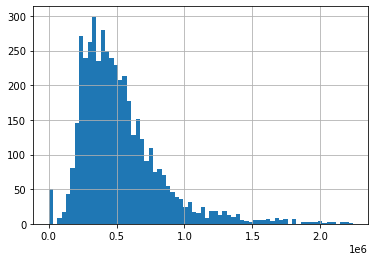

In [759]:
housing_df['price'].hist(bins=70)
plt.show()

In [760]:
#Splitting The Data
#Create the price bins
stratify_attribute = 'price'
housing_df[stratify_attribute + '_cats'] = pd.qcut(housing_df[stratify_attribute], 4)

In [761]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.566000e+03,4566.000000,4566.000000,4566.000000,4.566000e+03,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000
mean,5.272448e+05,3.393123,2.147668,2115.666010,1.477236e+04,1.509746,0.005694,0.229085,3.450942,1810.408673,305.257337,1970.787560,809.375164
std,3.053655e+05,0.903364,0.762967,903.268039,3.574062e+04,0.537797,0.075253,0.757348,0.676067,830.905298,448.625012,29.699517,979.550405
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.202500e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.599950e+05,3.000000,2.250000,1970.000000,7.663000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.500000e+05,4.000000,2.500000,2600.000000,1.092000e+04,2.000000,0.000000,0.000000,4.000000,2290.000000,600.000000,1997.000000,1999.000000
max,2.238888e+06,9.000000,6.500000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2850.000000,2014.000000,2014.000000


In [762]:
#Transform yr_built attribute to the age of the building
reference_year = 2014
housing_df['yr_built'] = reference_year - housing_df['yr_built']
housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_cats
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,59,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,"(-0.001, 320250.0]"
1,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,48,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,"(320250.0, 459995.0]"
2,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,51,0,857 170th Pl NE,Bellevue,WA 98008,USA,"(320250.0, 459995.0]"
3,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,38,1992,9105 170th Ave NE,Redmond,WA 98052,USA,"(459995.0, 650000.0]"
4,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,76,1994,522 NE 88th St,Seattle,WA 98115,USA,"(459995.0, 650000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4561,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,60,1979,501 N 143rd St,Seattle,WA 98133,USA,"(-0.001, 320250.0]"
4562,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,31,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,"(459995.0, 650000.0]"
4563,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,5,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,"(320250.0, 459995.0]"
4564,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,40,0,5148 S Creston St,Seattle,WA 98178,USA,"(-0.001, 320250.0]"


In [763]:
#Convert yr_renovated to renovation age by subtracting if from the reference year i.e. 2014 
reference_year = 2014
for i in range(housing_df.shape[0]):
    if housing_df.loc[i,'yr_renovated'] != 0:
        housing_df.loc[i,'yr_renovated'] = reference_year - housing_df.loc[i,'yr_renovated']
    elif housing_df.loc[i,'yr_renovated'] == 0:
        housing_df.loc[i,'yr_renovated'] = housing_df.loc[i,'yr_built']
    


In [764]:
#Both these transformations failed to show any higher correlation between the year built or renovated and the price of the house.
#Therefore, we don't use them in the final training.

In [765]:
#One Hot Encoding
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
one_hot_zipcode = pd.get_dummies(housing_df['statezip'])
one_hot_zipcode
housing_df = housing_df.drop('statezip',axis=1)
housing_df = housing_df.join(one_hot_zipcode)

In [766]:
# #Outlier Treatment For Price Remove The Data Points which have price that is 
# housing_df['z_score'] = abs(housing_df['price'] - housing_df['price'].mean())/housing_df['price'].std()
# housing_df = housing_df[housing_df['z_score']<3]
# housing_df.drop('z_score', axis=1, inplace=True)
# housing_df.reset_index(drop=True)

In [767]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4)
for train_index, test_index in split.split(housing_df, housing_df[stratify_attribute + '_cats']):
 strat_train_set = housing_df.loc[train_index]
 strat_test_set = housing_df.loc[test_index]

In [768]:
#Check distribution of data in test set
strat_test_set[stratify_attribute+"_cats"].value_counts() / len(strat_test_set)

(459995.0, 650000.0]     0.253829
(-0.001, 320250.0]       0.250547
(320250.0, 459995.0]     0.249453
(650000.0, 2238888.0]    0.246171
Name: price_cats, dtype: float64

In [769]:
#Check distribution of data in train set
strat_train_set[stratify_attribute+"_cats"].value_counts() / len(strat_train_set)

(459995.0, 650000.0]     0.253834
(-0.001, 320250.0]       0.250000
(320250.0, 459995.0]     0.250000
(650000.0, 2238888.0]    0.246166
Name: price_cats, dtype: float64

## 1.6 Discuss how you dealt with missing data and/or categorical data, if necessary, including describing why you chose to do it this way.
There was no missing data in this dataset, which can be seen as there are no null values for each attribute.
For the categorical attributes like bedrooms, we are going to keep them as they are because theygive ordinal information about the data. Categorical with text values that we need to deal with are present in the attributes data are date, street, city, statezip, and country. We have already dropped date, street, city, and country, for the reasons we mentioned earlier. For the statezip, we will transform it using OneHotEncoder as we cannot assing logical numerical values to accurately represent the information.

In [770]:
#Drop the columns mentioned ebfore
drop_columns = ['date', 'street', 'city', 'country']

drop_threshold = 0.1
# for i in correlation_matrix['price']:
features = list(correlation_matrix['price'].index) 
for i,f in zip(correlation_matrix['price'], features):
    if i<drop_threshold:
        drop_columns.append(f)
print(drop_columns)

for set_ in (strat_train_set, strat_test_set):
    set_.drop(stratify_attribute + '_cats', axis=1, inplace=True)
    #drop other columns
    for col in drop_columns:
        set_.drop(col, axis=1, inplace=True)





['date', 'street', 'city', 'country', 'sqft_lot', 'condition', 'yr_built', 'yr_renovated']


## 1.7 Discuss how you scaled the attributes, if necessary, and why?
We see a high standard deviation for sqft_above and sqft_basement. Thus, scaling will help to maintain the relative information while modifying the range of the values. According to the book (p 69), Standardization is less affected by the outliers. So, we will choose Standardization over min-max scaling. We also tried min-max scaling but observed that it showed no noticeable improvement in the evaluation metrics therefore finalized standardization based scaling. We apply this transformation to all the numerical attributes so that they are all centred around 0 and have a standard deviation of 1. Bringing all the attributes to a simlar range by doing this facilitates smoother training.

In [771]:
#Copy Train Set Attributes And Labels For Transformation

housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

#First Transform the numerical attributes
from sklearn import preprocessing
# transform_features = ['bedrooms',	'bathrooms',	'sqft_living',	'floors',	'waterfront',	'view',	'sqft_above',	'sqft_basement']
transform_features = ['bedrooms',	'bathrooms',	'sqft_living',	'floors',	'waterfront',	'view',	'sqft_above',	'sqft_basement']

for i in drop_columns:
    if i in transform_features:
        transform_features.remove(i)

std_scale = preprocessing.StandardScaler().fit(housing[transform_features])
housing[transform_features] = std_scale.transform(housing[transform_features])

## 1.8 Train a Linear Regression model (see chapter 2 of "Hands-on Machine Learning...") using the training data. Then make predictions of the housing prices of the test data, using the trained model. Summarize performance using the appropriate evaluation metrics. Analyze and discuss the results. Also, include thoughts about what further can be explored to increase performance.

We choose the evaluation metrics Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Coefficient of Determination (R2 score) to evaluate our model. We obtain train and test R2 score of 0.72 and 0.65 respectively. Similarly we obtain and MAE and RMSE of 95087.16 162539.10 respectively for the train set and an MAE and RMSE of 101476.44 179274.79 for the test set. Additionally we can see that the test scores are slightly less than the train scores. These results suggest that the model found a decent correlation and a pettern between the input attributes and the output variable althouogh it might have mildly overfitted. We also tried one other technique to see if it improves the performance which was to standardize the target variable as well. But it had no effect on the model. We also tried different combinations of features only to notice that it had noticeable effect on the model. These results in our opinion are justified as none of the attributes were strongly correlated with the target varaible and only one the sqft attribtues had moderate correaltion with it. However, we believe we can obtain a better performance by trying more powerful models like xgboost. Other ways to improve the performance could be to obtain more and better data or additional data attributes which have higher correlation with the price, such as the median income in a location. Finally, we can also explore other ways to improve the model such as training multiple models on different parts of the dataset and combine their predictions, which could result in a better performance.

In [772]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

#Train Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print("Coefficient of determination: %.2f" % r2_score(housing_labels, housing_predictions))
print('Mean Absolute Error:', lin_mae)
print("RMSE:", lin_rmse)


#Prev Metrics
# Coefficient of determination: 0.72
# Mean Absolute Error: 95087.15934542773
# RMSE: 162539.10994832576

Coefficient of determination: 0.72
Mean Absolute Error: 95087.15934542773
RMSE: 162539.10994832576


In [773]:
#Evaluation on the test set
#Copy Train Set Attributes And Labels For Transformation
housing_test = strat_test_set.drop("price", axis=1)
housing_test_labels = strat_test_set["price"].copy()

#First Transform the numerical attributes
from sklearn import preprocessing
transform_features = ['bedrooms',	'bathrooms',	'sqft_living',	'floors',	'waterfront',	'view',	'sqft_above',	'sqft_basement']

for i in drop_columns:
    if i in transform_features:
        transform_features.remove(i)

housing_test[transform_features] = std_scale.transform(housing_test[transform_features])
housing_test

housing_test_predictions = lin_reg.predict(housing_test)
lin_mse = mean_squared_error(housing_test_labels, housing_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(housing_test_labels, housing_test_predictions)
print("Coefficient of determination: %.2f" % r2_score(housing_test_labels, housing_test_predictions))
print('Mean Absolute Error:', lin_mae)
print("RMSE:", lin_rmse)

Coefficient of determination: 0.65
Mean Absolute Error: 101476.43592390273
RMSE: 179274.79376817244


# Question 2

## 2.1 Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

First, we read the CSV file into a data frame using the pandas library.

Second, we used the info() method to examine the data. We noticed that the dataframe has 1949 entries and 11 columns or attributes. On observing the attributes’ data types, we found that 9 of the attributes had float64 as their data type, 1 had int64 as its data type, and 1 attribute had object as its data type. Furthermore, we realized that some attributes had missing/null values. For example, Log GDP per capita has 36 null values, Social support has 13 null values, Healthy life expectancy at birth has 95 null values, Freedom to make life choices has 32 null values, Generosity has 89 null values, Perceptions of corruption has 110 null values, Positive affect has 22 null values, and Negative affect has 16 null values.

Using the info() method, we observed that the following 10 attributes are continuous-valued as they had either float64 or int64 as their data types: year, Life Ladder, Log GDP per capita, social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, and Negative affect.
Additionally, we found that the country name attribute has object as its data type, and when we checked it using the value_counts() method, it is, in fact categorical data.

In [774]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [775]:
happiness_csv_path = 'Datasets/happiness_data.csv'
happiness_df = pd.read_csv(happiness_csv_path)
happiness_df.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [776]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [777]:
# We can also get the size of the dataframe using shape
happiness_df.shape

(1949, 11)

In [778]:
for att in happiness_df.columns:
    print('#', att + ':')
    print(happiness_df[att].value_counts())
    print('-'*80)

# Country name:
Israel          15
India           15
Philippines     15
Germany         15
South Africa    15
                ..
Oman             1
Maldives         1
Suriname         1
Cuba             1
Guyana           1
Name: Country name, Length: 166, dtype: int64
--------------------------------------------------------------------------------
# year:
2017    147
2011    146
2014    145
2019    144
2015    143
2012    142
2016    142
2018    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64
--------------------------------------------------------------------------------
# Life Ladder:
5.252    5
5.304    4
5.057    4
6.375    4
5.786    4
        ..
5.031    1
3.355    1
2.997    1
6.851    1
4.937    1
Name: Life Ladder, Length: 1553, dtype: int64
--------------------------------------------------------------------------------
# Log GDP per capita:
10.546    5
10.166    4
9.830     4
10.783    4
9.788    

## 2.2 Display the statistical values for each of the attributes, along with visualizations (e.g. histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? How is the data distributed for each feature/attribute? What bad data problems could be present?

We used describe() and hist() methods to check for the statistical values of the numerical attributes.We realized that:

Year: 
Looking at the statistical values, the min value is 2005 (the first data was collected in 2005) and the max value is 2020 (the last data was collected in 2020). Also, most (75%) of the data was collected before 2017 (75%), which suggests that most of our data is more that five years old.


Life Ladder: We observe that Life ladder resembles a normal bell-shaped distribution. As it shows how happy people feel, we pick this as our label to predict based on other attributes. Using the describe() method we see that the mean value of this attribute is approximately 5.5 and the standard deviation is 1.1, and we can say that 68% of the people have a happiness feeling between 4.5 to 6.5. Moreover, the min value is 2.37, and the max is 8, suggesting that we cannot predict a life ladder below 2.37 and above 8 and should talk to the people who collected the data to see if this is fine. And if we need to predict values for those areas, we need to gather data for those ranges. Also, we may need to do feature scaling to normalize this value as most of the other attributes' values are between 0 and 1.

Log GDP per capita: It does not have a normal distribution. We see that it has two peaks around 9 and 11 which might make our model prone to errors, and we should normalize the attribute. We see that 75% of the data is below 10, so we don't have as much data for high GDPs and lower GDPs, and our model might predict Life Ladder better for lower GDPs. One solution is that we collect more data with higher GDP values.

Social Support: Based on the histogram, we see that the social support does not have a perfect normal distribution, and it has a heavy tail on the left; it extends much farther to the left of the median than to the right. It makes it harder for our regression model to detect patterns, and we'll need to transform this to have a more bell-shaped distribution. We see that there are some scattered values below 0.4 which suggest outliers. There are several ways to deal with outliers: ignoring rows with these values, collecting more data for these ranges, and so on. Moreover, there are 13 missing values, and we can calculate the mean for these values.

Healthy Life Expectancy at birth: It does not have a normal distribution. It has two peaks on the right, and it is skewed to the left much farther. We notice that there are some outliers below 40, and we must either collect more data for this range so that our model could predict well for this range or remove these values, or replace the mean for those values. In this case, because there are few values as outliers, it's better to remove them as they can negatively affect our regression model. Moreover, as we have 95 null values, and its almost 5% of the data we better populate this data using the mean values. We should also scale the values to resemble the range of other attributes.

Freedom to make life choices: It is not normally distributed, and it is a little skewed to the left. We see some outliers below 0.3 as the std is 0.1 and the mean is 0.7, values that are lower or bigger than 3 std of the mean are considered outliers. As the numbers are not significant, we better remove these outliers. There are some missing values, but we can either remove those rows or populate them with the mean since the number is not substantial. Moreover, the mean is 0.7, and 75% have a value less than 0.86 suggesting that most of the people in this dataset have a freedom to make life choices.

Generosity:
We can confidently say that Generosity has a normal bell-shaped distribution, which is slightly skewed to the right. There are some outliers on the right, and if we remove them, we can get a better normal distribution. Moreover, we see that Generosity ranges from -0.3 to 0.7; as we have negative values, we can scale these values for better alignment with other attributes.

Perceptions of Corruption: We observe that perception of corruption does not have a bell-shaped distribution, which is heavily skewed to the left. We need to transform these attributes into a more bell-shaped (normal) distribution. Furthermore, we don't have as much data below 0.6, which means that our model may not predict well for people who have perceptions of corruption below the value of 0.6. We may need to gather more data for this range, and we can train our model with more values to measure the outcome. Also, the min is 0.04 and the max is 0.98 suggesting that we cover all the range, the mean is 0.71 meaning that most of the people have a high perception of corruption, and since 75% of the data is 0.87 we have more data with high perception of corruption like we explained before.

Positive Affect:
We see that this attribute is not normally distributed. There are multiple peaks in the middle, and there are some outliers below 0.4 which is better to be removed. As with other attributes, there are some missing values, but since the percentage is not significant, we replace the mean instead. Also, the min is 0.32, the max is 0.94, the mean is 0.71, and the 75% is 0.8 showing that most of the people in our dataset feel happiness and laughter.

Negative Affect: 
We see that it is almost normally distributed but is a little skewed to the right. There are some outliers between 0.6 and 0.7, which is better to be removed. Moreover, the min is 0.08, the max is 0.71, the mean is 0.27, and the 75% is 0.32 showing that most people in our dataset are less angry or worry less.

In general, we need to handle the missing (null) values. If the number is not significant, we should consider populating the data with mean. But, we need to be careful about how we want to populate data, if the number of missing values is significant to the total number of data, it's better not to consider this attribute for our model, as we may provide misleading data. But, if we have a lot of other data with no missing values, we can populate data using the mean or imputation.

In [779]:
happiness_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Life Ladder'}>,
        <AxesSubplot:title={'center':'Log GDP per capita'}>],
       [<AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'Positive affect'}>],
       [<AxesSubplot:title={'center':'Negative affect'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

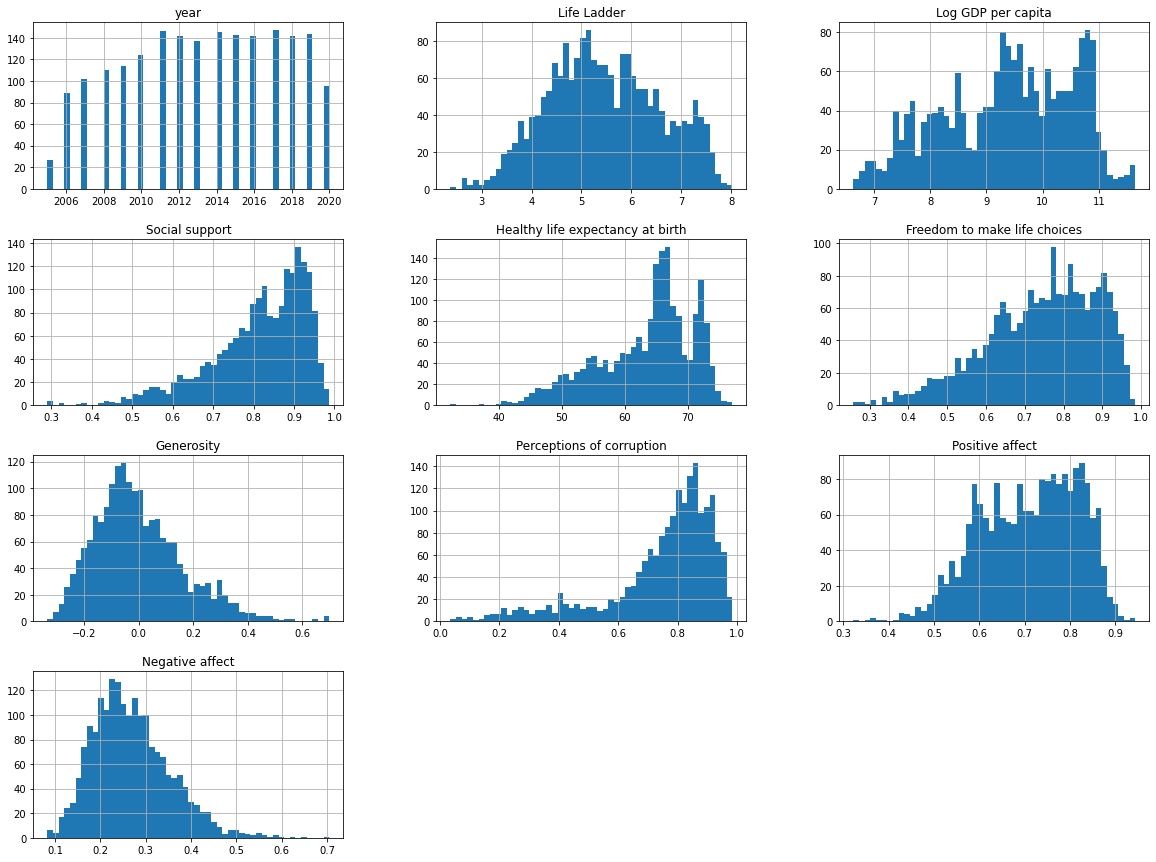

In [780]:
%matplotlib inline
happiness_df.hist(bins=50, figsize =(20, 15))

## 2.3 Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coe cient (PCC) and generating scatter plots.

To compute the Pearson Correlation Coefficient, we must first split our data into training and testing sets and set aside the testing set. The reason for this is that we need to only work on the training data from now on because our brain is smart enough to detect patterns available in the test set, and it may affect us to choose a specific machine learning algorithm which causes our model to be prone to overfitting. To split the data into the training and the testing set, we will use the StratifiedShuffleSplit class from scikit learn. But first, we need to divide the data based on an attribute (here, we used Life Ladder) to get data samples from each stratum; otherwise, our data may not represent the whole dataset. After we divide the data into strata, we use that to generate our train and test sets. Finally, we check that we have selected enough data from each stratum using the value counts. As it is displayed, the percentage in the training and the testing sets totally match the original data set.

<AxesSubplot:>

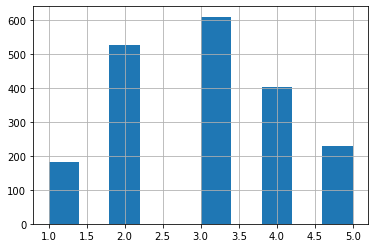

In [781]:
stratify_attribute = 'Life Ladder'
happiness_df[stratify_attribute + '_cat'] = pd.cut(happiness_df[stratify_attribute],
bins=[0, 4, 5, 6, 7, np.inf],
labels=[1, 2, 3, 4, 5])
happiness_df[stratify_attribute + '_cat'].hist()

In [782]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(happiness_df, happiness_df[stratify_attribute + '_cat']):
    strat_train_set = happiness_df.loc[train_index]
    strat_test_set = happiness_df.loc[test_index]

In [783]:
strat_test_set[stratify_attribute + '_cat'].value_counts() / len(strat_test_set)

3    0.312821
2    0.271795
4    0.205128
5    0.117949
1    0.092308
Name: Life Ladder_cat, dtype: float64

In [784]:
strat_train_set[stratify_attribute + '_cat'].value_counts() / len(strat_train_set)

3    0.313021
2    0.270045
4    0.206543
5    0.116742
1    0.093650
Name: Life Ladder_cat, dtype: float64

In [785]:
happiness_df[stratify_attribute + '_cat'].value_counts() / len(happiness_df)

3    0.312981
2    0.270395
4    0.206260
5    0.116983
1    0.093381
Name: Life Ladder_cat, dtype: float64

Since we only used the 'Life Ladder_cat' to have representative data splits, we need to remove it from both the training and the testing sets.

In [786]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Life Ladder_cat', axis=1, inplace=True)
strat_train_set.info()
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1664 to 1481
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Life Ladder                       1559 non-null   float64
 3   Log GDP per capita                1528 non-null   float64
 4   Social support                    1549 non-null   float64
 5   Healthy life expectancy at birth  1511 non-null   float64
 6   Freedom to make life choices      1533 non-null   float64
 7   Generosity                        1485 non-null   float64
 8   Perceptions of corruption         1484 non-null   float64
 9   Positive affect                   1542 non-null   float64
 10  Negative affect                   1547 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.2+ KB
<class 

We are going to work on our train set from now on as "happiness: until we are done with our model training

In [787]:
happiness = strat_train_set.copy()

Now we are going to use the corr() method to compute PCC and determine the relationships between attributes

In [788]:
corr_matrix = happiness.corr()

Now, we will see how each attribute correlates with the "Life Ladder" attribute, which is our label.

In [789]:
corr_matrix['Life Ladder'].sort_values(ascending=False)

Life Ladder                         1.000000
Log GDP per capita                  0.791747
Healthy life expectancy at birth    0.747379
Social support                      0.706507
Positive affect                     0.540388
Freedom to make life choices        0.526068
Generosity                          0.187976
year                                0.037891
Negative affect                    -0.299733
Perceptions of corruption          -0.415807
Name: Life Ladder, dtype: float64

From the above matrix, we can make some predictions, as we can see the Life Ladder attribute has a strong positive correlation with some of the attributes like "Log GDP per capita," "Healthy life expectancy at birth," and "Social support" as PCC is near to 1. It has a somewhat positive correlation with other attributes like "Positive affect" and "Freedom to make life choices." We can also see that it negatively correlates with some attributes such as "Perceptions of corruption" and "Negative affect." Moreover, we can surely determine that "Year" has no linear correlation with Life Ladder since its value is near to zero. Finally, Generosity also has a very weak correlation with Life Ladder. Now, we will generate the scatter plots to check our predictions.

array([[<AxesSubplot:xlabel='Life Ladder', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Log GDP per capita', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Social support', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Positive affect', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Freedom to make life choices', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='year', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Negative affect', ylabel='Life Ladder'>,
        <AxesSubplot:xlabel='Perceptions of corruption', ylabel='Life Ladder'>],
       [<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>,
        <AxesSubplot:xlabel='Log GDP per capita', ylabel='Log GDP per capita'>,
        <AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Log GDP per capita'>,
        <AxesSubplot:xlabel='S

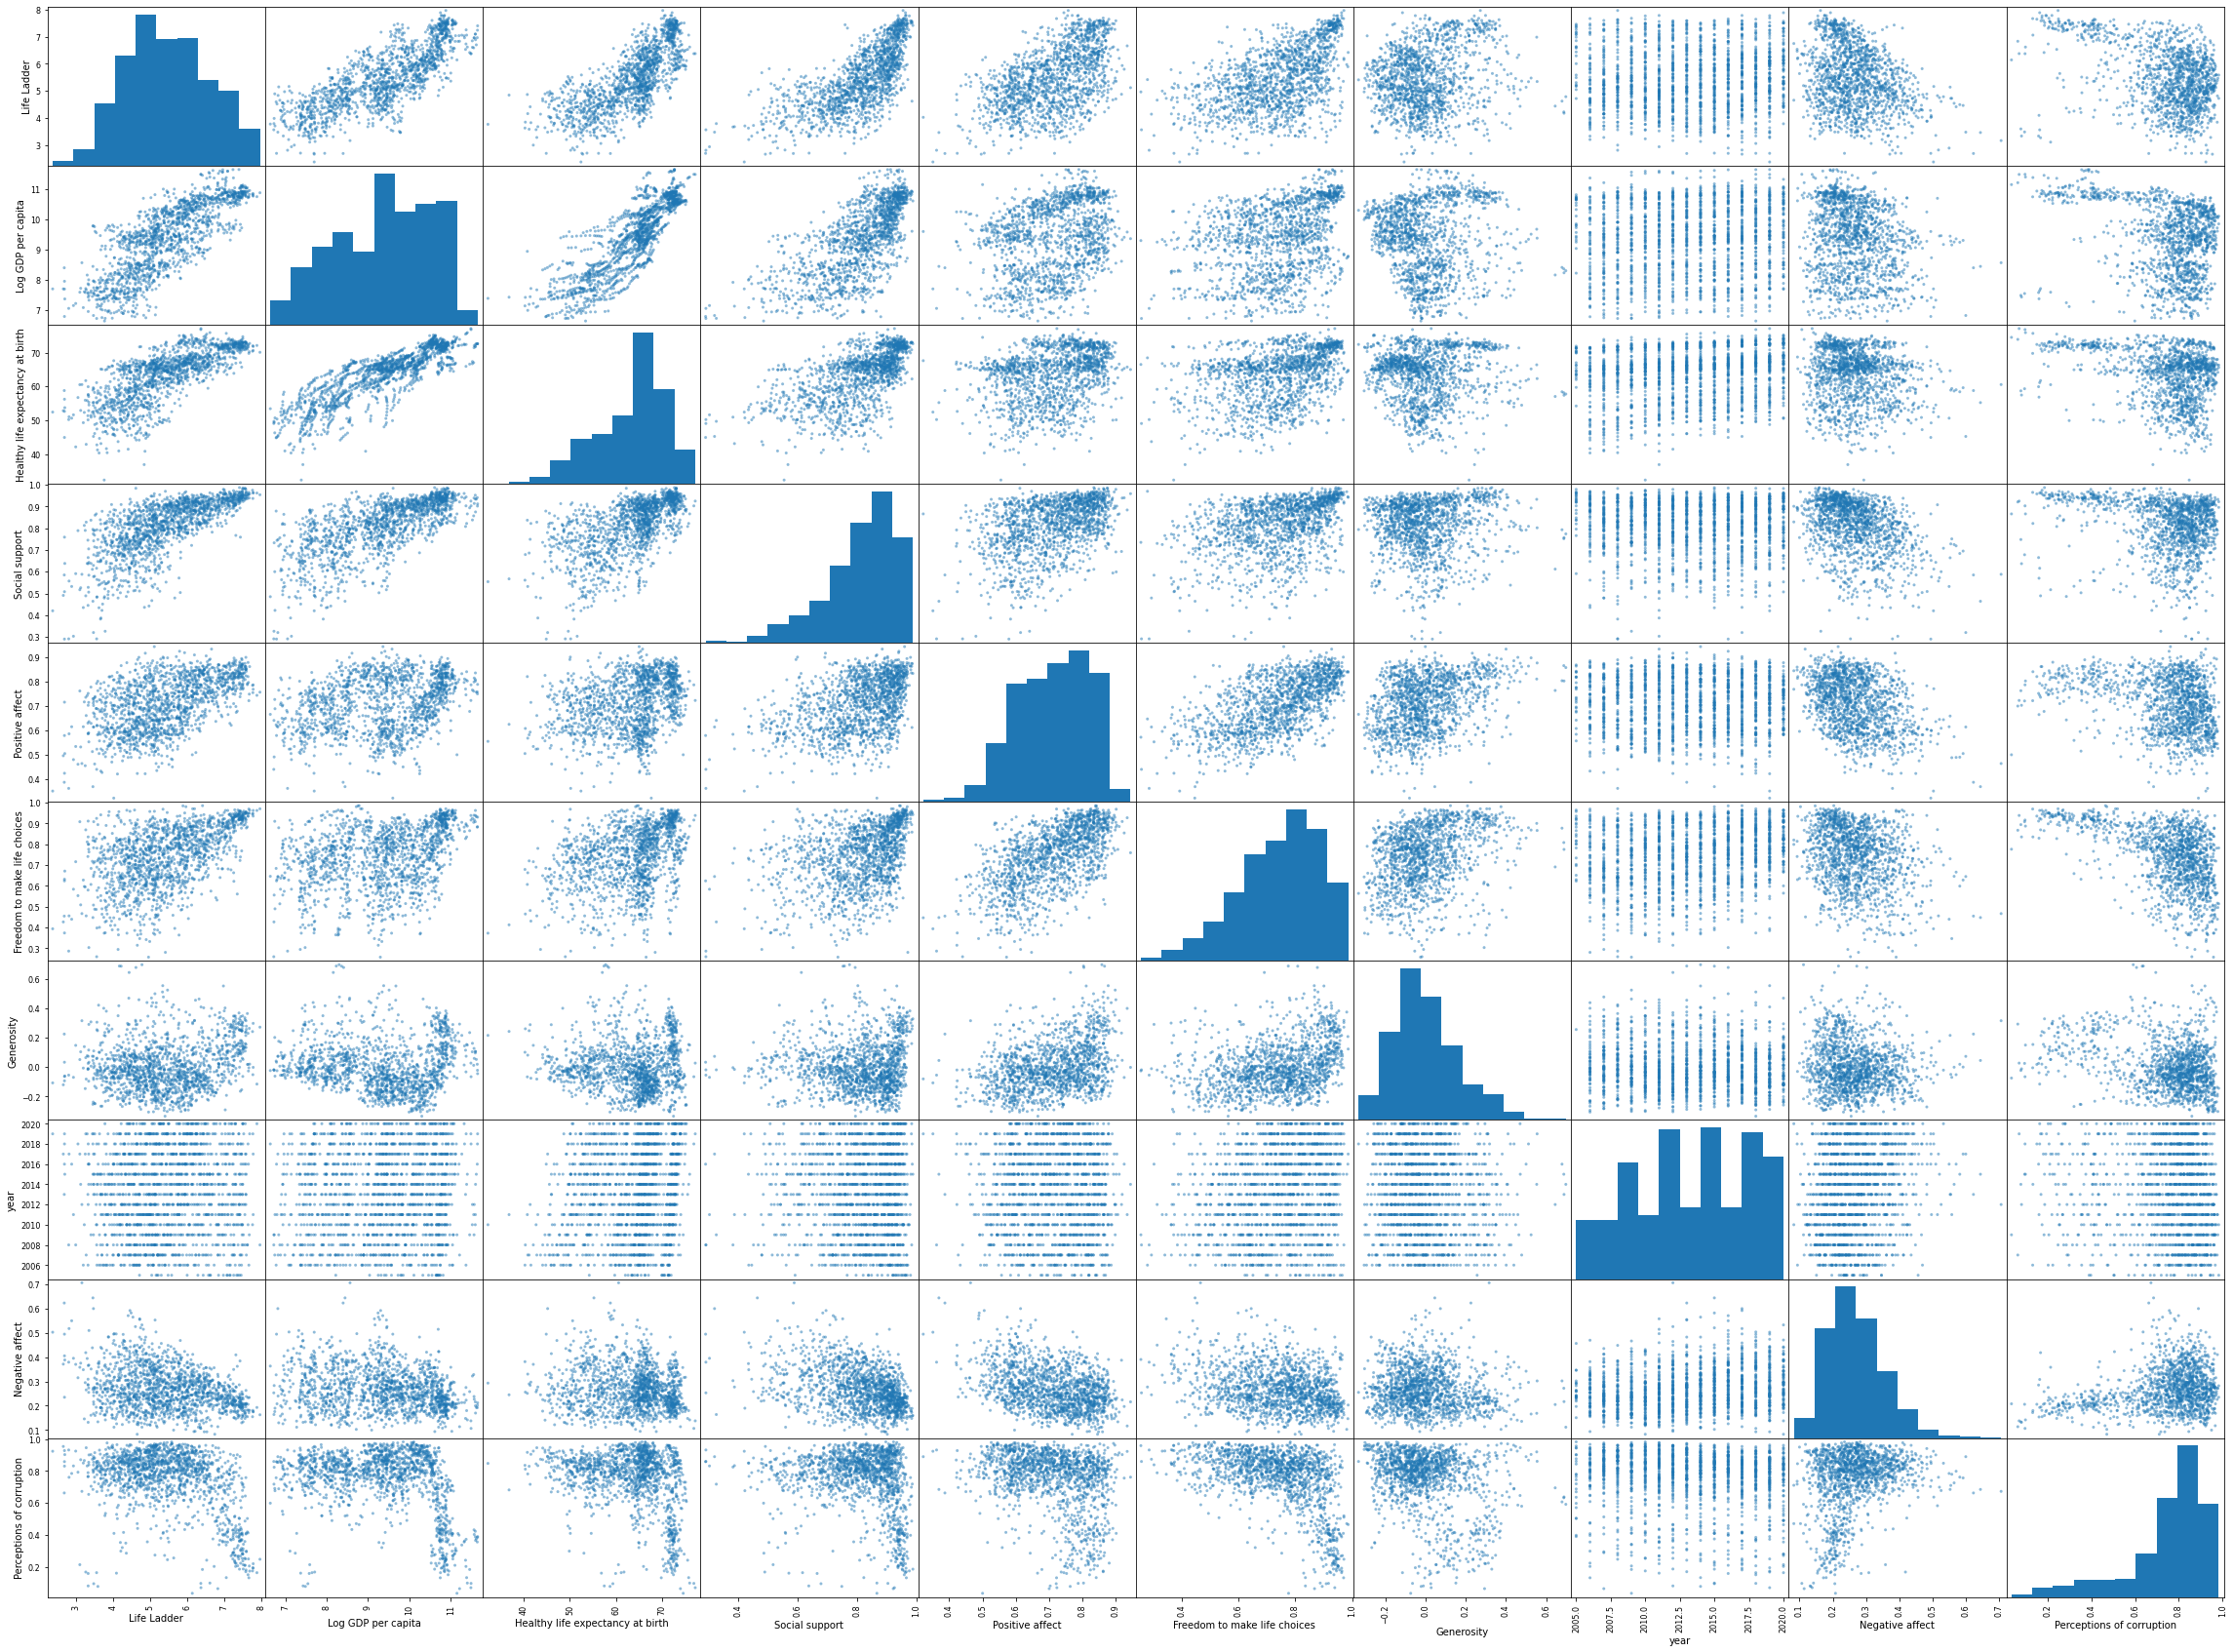

In [790]:
from pandas.plotting import scatter_matrix
attributes = ["Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth", "Social support", "Positive affect",
               "Freedom to make life choices", "Generosity", "year", "Negative affect", "Perceptions of corruption"]
scatter_matrix(happiness[attributes], figsize=(40, 30))


The scatter plot can also support the above claims. The data in some of the plots are very scattered, which means that they cannot help predict the Life Ladder value.
We can summarize the attributes' relationships as follows:

Life Ladder:
Life Ladder has a strong 0.79 correlation with Log GDP per capita, which suggests that (the more economically powerful a country is, the happier people are), it also has a strong positive correlation (0.75) with Healthy life expectancy at birth, which suggests that as people feel happier, its rank based on happiness increases. Moreover, it has a strong correlation of 0.71 with social support, which indicates that people feel happier as they feel more support. It also has a positive correlation of 0.54 with Positive affect, suggesting that as people feel more joy and laughter, they feel happier. Freedom to make life choices also has a positive correlation (0.52) with Life Ladder, and it shows that as people are free to make their choices, they feel happier.

In [791]:
corr_matrix['Log GDP per capita'].sort_values(ascending=False)

Log GDP per capita                  1.000000
Healthy life expectancy at birth    0.848198
Life Ladder                         0.791747
Social support                      0.697415
Freedom to make life choices        0.354752
Positive affect                     0.304004
year                                0.072281
Generosity                         -0.016866
Negative affect                    -0.207854
Perceptions of corruption          -0.321528
Name: Log GDP per capita, dtype: float64

Log GDP per capita: 
We can see that Log GDP per capita has a very strong positive correlation (0.85) with Healthy life expectancy, which suggests that as the rank of the country increases, the GDP increases with it. It also has a positive correlation (0.7) with Social support, suggesting that more social support helps the economy. Moreover, the GDP has a weak positive correlation with Freedom to make life choices and positive affect 0.35 and 0.3, respectively. We can also see this weak connection in the scatterplots as well. Furthermore, the GDP has a weak negative correlation of -0.21 and -0.32, with Negative affect and Perceptions of corruption, respectively. Finally, as the PCC is near to 0 for year and Generosity, we can say that there is no linear correlation among these attributes, as we can see in the scatterplots. 

In [792]:
corr_matrix['Healthy life expectancy at birth'].sort_values(ascending=False)

Healthy life expectancy at birth    1.000000
Log GDP per capita                  0.848198
Life Ladder                         0.747379
Social support                      0.619993
Freedom to make life choices        0.377323
Positive affect                     0.312147
year                                0.158547
Generosity                         -0.003695
Negative affect                    -0.129891
Perceptions of corruption          -0.303230
Name: Healthy life expectancy at birth, dtype: float64

Healthy life expectancy at birth:
We observe a positive correlation of 0.62 with Social support, a somewhat linear correlation of 0.38, 0.31 with Freedom to make life choices, and Positive affect, and almost no linear relation with year, generosity, and negative affect. And finally, a weak negative correlation of -0.3 with perceptions of corruption.

In [793]:
corr_matrix['Social support'].sort_values(ascending=False)

Social support                      1.000000
Life Ladder                         0.706507
Log GDP per capita                  0.697415
Healthy life expectancy at birth    0.619993
Positive affect                     0.441292
Freedom to make life choices        0.401013
Generosity                          0.052680
year                               -0.014652
Perceptions of corruption          -0.205823
Negative affect                    -0.391305
Name: Social support, dtype: float64

Social support: We observe that it is linearly correlated with positive affect, meaning that as people feel more support from around them, they feel more joy. A 0.4 PCC with Freedom to make life choices meaning that as people feel more social support, they have the freedom to make life choices. Almost a non-linear relation with Generosity and year, a weak negative correlation (0.21) with Perceptions of corruption, and a moderate negative correlation of -0.39 with Negative affect, meaning that as people feel more support, they worry less and are less angry.

In [794]:
corr_matrix['Positive affect'].sort_values(ascending=False)

Positive affect                     1.000000
Freedom to make life choices        0.613175
Life Ladder                         0.540388
Social support                      0.441292
Generosity                          0.355222
Healthy life expectancy at birth    0.312147
Log GDP per capita                  0.304004
year                               -0.005604
Perceptions of corruption          -0.297425
Negative affect                    -0.390870
Name: Positive affect, dtype: float64

We observe a moderate positive PCC of 0.36 with Generosity suggesting that as people feel more joy, they donate more money. A PCC of 0.31 and 0.3 with Healthy life expectancy at birth, and Log GDP per capita, respectively. There is no linear relation with year as PCC is almost 0, and a nearly weak negative correlation of -0.28 with perceptions of corruption and a moderate negative correlation of -0.39 with negative affect. It means that as people feel more joy, they feel less corruption and worry less.

In [795]:
corr_matrix['Freedom to make life choices'].sort_values(ascending=False)

Freedom to make life choices        1.000000
Positive affect                     0.613175
Life Ladder                         0.526068
Social support                      0.401013
Healthy life expectancy at birth    0.377323
Log GDP per capita                  0.354752
Generosity                          0.323193
year                                0.210334
Negative affect                    -0.269648
Perceptions of corruption          -0.491037
Name: Freedom to make life choices, dtype: float64

Freedom to make life choices: It has a moderate PCC with Generosity showing that as people are more free to make their life choices, they become more generous. It has a weak negative affect of -0.27 with Negative affect. A negative correlation of -0.49 with perceptions of corruption, meaning that as people are more free to make choices, they feel less corruption.

In [796]:
corr_matrix['Generosity'].sort_values(ascending=False)

Generosity                          1.000000
Positive affect                     0.355222
Freedom to make life choices        0.323193
Life Ladder                         0.187976
Social support                      0.052680
Healthy life expectancy at birth   -0.003695
Log GDP per capita                 -0.016866
year                               -0.056725
Negative affect                    -0.091132
Perceptions of corruption          -0.300093
Name: Generosity, dtype: float64

Generosity: We can say that generosity has no linear relation with Healthy life expectancy, GDP, year, and negative affect. It has an almost weak negative correlation (-0.3) with Perceptions of corruption.

In [797]:
corr_matrix['year'].sort_values(ascending=False)

year                                1.000000
Freedom to make life choices        0.210334
Negative affect                     0.188833
Healthy life expectancy at birth    0.158547
Log GDP per capita                  0.072281
Life Ladder                         0.037891
Positive affect                    -0.005604
Social support                     -0.014652
Generosity                         -0.056725
Perceptions of corruption          -0.079778
Name: year, dtype: float64

Year: As it is obvious from above, year has no linear relation with most of the attributes (PCC is almost zero for all of them). We can see that it has a weak positive correlation with Freedom to make life choices suggesting that as the data is for recent years, people have more freedom to make life choices. Overall, it's safe to say that we can remove year from our happiness indicators.

In [798]:
corr_matrix['Negative affect'].sort_values(ascending=False)

Negative affect                     1.000000
Perceptions of corruption           0.249397
year                                0.188833
Generosity                         -0.091132
Healthy life expectancy at birth   -0.129891
Log GDP per capita                 -0.207854
Freedom to make life choices       -0.269648
Life Ladder                        -0.299733
Positive affect                    -0.390870
Social support                     -0.391305
Name: Negative affect, dtype: float64

Negative affect: It has a weak positive correlation (0.25) with perceptions of corruption, suggesting that as people worry more or are angrier, they feel more corruption.

## 2.4. What attributes could be removed from the data, since they may not be useful for predicting the housing price. Why?!

- We need to remove the Life Ladder (our label) from our training data and save a copy of our labels.
- As we explained above, "year" does not have a noticeable correlation with any of the attributes, and since it was the year the data was recorded, it makes sense to remove this attribute. This is also obvious in the scatter plots as well.
- Country name can also be removed because we want to predict people's happiness based on some attributes, but if we wanted to consider the country as one of those attributes, we should predict people's happiness rate in their own countries, and in this case, the definition differs. In this case, we need to have people's happiness rate in their own countries in many different years to train our model based on those factors, and finally, be able to predict, for example, Turkish people's happiness rate in 2019. Therefore, because we only have one instance for many countries, we cannot analyze people's happiness like this. Consequently, we decided to remove the country name along with the year.
- Another important thing we need to take care of is the missing (null) values in different attributes. We can take care of them in multiple ways. We can either remove those instances or impute the missing values using their mean or median. Moreover, suppose the null value percentage is high in a given attribute. In that case, it's better not to impute the value for those attributes because there is a great chance that we could enter misleading values that would negatively affect our results.

In [799]:
happiness = strat_train_set.drop('Life Ladder', axis=1)
happiness_labels = strat_train_set['Life Ladder'].copy()

happiness = happiness.drop('year', axis=1)
happiness = happiness.drop('Country name', axis=1)
# checking attributes to see that they are removed
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1664 to 1481
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1528 non-null   float64
 1   Social support                    1549 non-null   float64
 2   Healthy life expectancy at birth  1511 non-null   float64
 3   Freedom to make life choices      1533 non-null   float64
 4   Generosity                        1485 non-null   float64
 5   Perceptions of corruption         1484 non-null   float64
 6   Positive affect                   1542 non-null   float64
 7   Negative affect                   1547 non-null   float64
dtypes: float64(8)
memory usage: 109.6 KB


We can see that now we have 8 columns instead of 11.

In [800]:
median_arr = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',
             'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
for md in median_arr:
    md_median = happiness[md].median()
    happiness[md].fillna(md_median, inplace=True)

# all the attributes have 1559 values with no missing values
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1664 to 1481
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1559 non-null   float64
 1   Social support                    1559 non-null   float64
 2   Healthy life expectancy at birth  1559 non-null   float64
 3   Freedom to make life choices      1559 non-null   float64
 4   Generosity                        1559 non-null   float64
 5   Perceptions of corruption         1559 non-null   float64
 6   Positive affect                   1559 non-null   float64
 7   Negative affect                   1559 non-null   float64
dtypes: float64(8)
memory usage: 109.6 KB


## 2.5. Discuss how you split the data, including describing why you choose to do it this way.

As represented in the 1.3 section, we used stratified sampling to split the data. Another alternative would have been using the random sampling method, but it is flawed. As data is selected randomly from each section, our data might not represent the whole dataset, but using the stratified sampling method ensures that the selected data is representative of the entire data for both the training and the testing sets. Since splitting the data to 20-80 percentages is common for testing and training sets, respectively, we set the test_size to 0.2. We also set random_state to a fixed number of 42 because a fixed number will give us the same sets for both the test and training sets every time we run the code, making it easier to transform the data and interpret it. Also, it is very common to choose 42 for random_state; accordingly, we used the same value.

## 2.6. Discuss how you dealt with missing data and/or categorical data, if necessary, including describing why you chose to do it this way.

As explained in the 1.4 section, we dropped the year and country name columns. Then, we imputed the median of attributes with missing values (null) on all other attributes in the table because we thought their data would be valuable, and it would be better not to discard them. The only categorical data was the Country name column, but as explained in the 1.4 section, we discarded this column; therefore, we don't need to transform this attribute using a one-hot encoder or other methods like ordinal encoder.

## 2.7. Discuss how you scaled the attributes, if necessary, and why?

Since most of the other attributes' range is between zero and one, we decided to use MinMaxScaler to transform Log GDP per capita, Healthy life expectancy at birth, and Generosity values to this specific range. Then, we displayed this using the describe method, which shows the new scaled values for these attributes. Another scaling method was using the StandardScaler instead of MinMaxScaler. Overall, we can say that StandardScaler is considered a better solution as it is less affected by the outliers. Therefore, after scaling our attributes using the MinMaxScaler, and training our model, we decided to try our solution using the StandardScaler as well. Naturally, we scaled all of our attributes on the training set, but we received almost the same error rate as with MinMaxScaler; therefore, as MinMaxScaler would scale the attributes' values between the range of 0 and 1, we decided to stick with MinMaxScaler.

In [801]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_attr_arr = ['Log GDP per capita', 'Healthy life expectancy at birth', 'Generosity']
happiness[scaled_attr_arr] =  scaler.fit_transform(happiness[scaled_attr_arr])

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# happiness[list(happiness.columns)] =  scaler.fit_transform(happiness[list(happiness.columns)])

happiness.describe()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,0.544950,0.811514,0.693043,0.741894,0.325167,0.750797,0.710922,0.268405
std,0.228495,0.120123,0.165394,0.141525,0.154290,0.181389,0.107358,0.085500
min,0.000000,0.290000,0.000000,0.258000,0.000000,0.035000,0.322000,0.083000
25%,0.365151,0.747500,0.591071,0.645000,0.223621,0.700500,0.626500,0.207000
50%,0.563734,0.836000,0.732143,0.763000,0.302033,0.802000,0.723000,0.256000
75%,0.738081,0.905000,0.805804,0.852500,0.406583,0.867000,0.800000,0.318500
max,1.000000,0.987000,1.000000,0.985000,1.000000,0.983000,0.944000,0.705000


## 2.8. Train a Linear Regression model (see chapter 2 of "Hands-on Machine Learning...") using the training data. Then make predictions of people's happiness on the test data, using the trained model. Summarize performance using the appropriate evaluation metrics. Analyze and discuss the results. Also, include thoughts about what further can be explored to increase performance.

First, we check that there are no missing values (1559 non-null) in our training set; then, we import the Linear Regression model from sklearn and train our model based on the training set.

In [802]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 1664 to 1481
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                1559 non-null   float64
 1   Social support                    1559 non-null   float64
 2   Healthy life expectancy at birth  1559 non-null   float64
 3   Freedom to make life choices      1559 non-null   float64
 4   Generosity                        1559 non-null   float64
 5   Perceptions of corruption         1559 non-null   float64
 6   Positive affect                   1559 non-null   float64
 7   Negative affect                   1559 non-null   float64
dtypes: float64(8)
memory usage: 109.6 KB


In [803]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(happiness, happiness_labels)
happiness_predictions = lin_reg.predict(happiness)

After we trained our regression model, we calculated the Mean Squared Error and the Mean Absolute Error for our predictions. We got 0.54 and 0.42 error rates for RMSE and MAE, respectively. After printing the first five of our actual and predicted labels, we see that we predicted values really close to their true value, and as the error rates suggest, we did pretty well.

In [804]:
#Evaluating Regression Performance by computing the error in the predictions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_mse = mean_squared_error(happiness_labels, happiness_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(happiness_labels, happiness_predictions)
print('Root Mean Squared Error', lin_rmse)
print('Mean Absolute Error', lin_mae)

# Comparing the first five actual and predicted labels
print('Actual Labels', happiness_labels.values.tolist()[:5])
print('Predicted Labels', happiness_predictions[:5])

Root Mean Squared Error 0.5385648352181533
Mean Absolute Error 0.4189302808975864
Actual Labels [4.465, 6.391, 3.937, 4.396, 4.844]
Predicted Labels [5.11853649 6.12780306 4.53410769 4.91826429 4.64226682]


Another way to evaluate the regression performance is to calculate the coefficient of determination. As the best possible value for this is 1, and we received a 0.77 on ours, which is close to 80%, we can say that our performance rate is acceptable, but there are ways to improve it even further. 

In [805]:
# Assessing the regression performance using the coefficient of determination
from sklearn.metrics import r2_score
print("Coefficient of determination: %.2f" % r2_score(happiness_labels, happiness_predictions))

Coefficient of determination: 0.77


Now that we have trained our model, we are going to clean our testing set as well. So, we dropped the year and the Country name columns for the test set, filled the missing values using their median, and finally scaled the GDP, Healthy life expectancy at birth, and Generosity using MinMaxScaler.

In [806]:
# removing the labels from testing set
happiness_test = strat_test_set.drop('Life Ladder', axis=1)
happiness_test_labels = strat_test_set['Life Ladder'].copy()
# Cleaning the testing set
happiness_test = happiness_test.drop('year', axis=1)
happiness_test = happiness_test.drop('Country name', axis=1)
# imputing the missing values using their median
for md in median_arr:
    md_median = happiness_test[md].median()
    happiness_test[md].fillna(md_median, inplace=True)
# scaling the attributes on testing set
happiness_test[scaled_attr_arr] =  scaler.fit_transform(happiness_test[scaled_attr_arr])

# checking the scaled, missing and droped attributes
happiness_test.info()
happiness_test_labels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1644 to 522
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                390 non-null    float64
 1   Social support                    390 non-null    float64
 2   Healthy life expectancy at birth  390 non-null    float64
 3   Freedom to make life choices      390 non-null    float64
 4   Generosity                        390 non-null    float64
 5   Perceptions of corruption         390 non-null    float64
 6   Positive affect                   390 non-null    float64
 7   Negative affect                   390 non-null    float64
dtypes: float64(8)
memory usage: 27.4 KB


1644    7.434
307     7.025
368     6.157
1083    6.591
1237    7.205
        ...  
1910    4.350
213     3.762
611     6.621
1513    4.502
522     6.018
Name: Life Ladder, Length: 390, dtype: float64

As we saw above, there are no missing values (Null values) in our testing set (390 non-null values).

In [807]:
# testing our regression model on testing set
happiness_test_predictions = lin_reg.predict(happiness_test)

In [808]:
# checking the root mean squared and absolute errors on testing set for Evaluating Performance
lin_test_mse = mean_squared_error(happiness_test_labels, happiness_test_predictions)
lin_test_rmse = np.sqrt(lin_test_mse)
lin_test_mae = mean_absolute_error(happiness_test_labels, happiness_test_predictions)
print('Root Mean Squared Error', lin_test_rmse)
print('Mean Absolute Error', lin_test_mae)

Root Mean Squared Error 0.5964804442782269
Mean Absolute Error 0.461302064518994


In [809]:
# Evaluating regression performance
print("Coefficient of determination: %.2f" % r2_score(happiness_test_labels, happiness_test_predictions))

Coefficient of determination: 0.72


Here we see that our error rate is slightly more. In our training set, we got a rmse of 0.53, and here we got 0.59, showing 0.06 more error rate. Moreover, our regression performance is 0.72, close to the 0.77 that we got for our training set, which shows that our generalization is good and we're not overfitting.
However, there are other ways to increase performance, and one is dealing with outliers. We can either remove the outliers or use the mean for their values instead. Moreover, we could scale our labels as well to see if it would make any difference.
Another approach could be using the country name and not dropping this column. For instance, we could use the One-hot encoding method to transform this categorical data to numbers so that our model could work with it. Finally, we can explore more powerful models such as neural networks or random forests or the xgboost algorithm to improve our performance. These are all different solutions that can be tested, and we could see if one would work best.

# Question 3

## 3.1 Expanded Contractions

In [32]:
import re

contractions = {"ain't":"is not", "aren't": "are not", "can't": "cannot", 
                "could've": "could have", "couldn't": "could not",
                "didn't": "did not", "doesn't": "does not", "don't": "do not", 
                "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", 
                "he'll": "he will", "he's": "he is", 
                "how'd": "how did", "how'll": "how will", "how's": "how is",
                "i'd": "i would", "i'll": "i will", "i'm": "i am", "i've": "i have", 
                "isn't": "is not", "it'd": "it would", "it'll": "it will", "it's": "it is", "let's": "let us",
                "mayn't": "may not", "might've": "might have", "mightn't": "might not", 
                "must've": "must have", "mustn't": "must not",
                "needn't": "need not", "oughtn't": "ought not", 
                "she'd": "she would", "she'll": "she will", "she's": "she is",
                "should've": "should have", "shouldn't": "should not", 
                "that'd": "that would", "that's": "that is",
                "there'd": "there would", "there's": "there is",
                "they'd": "they would", "they'll": "they will", "they're": "they are", "they've": "they have", 
                "to've": "to have",
                "wasn't": "was not",
                "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have", 
                "weren't": "were not", 
                "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have",
                "when's": "when is", "when've": "when have", 
                "where'd": "where did", "where's": "where is", "where've": "where have",
                "who'll": "who will", "who's": "who is", "who've": "who have", 
                "why's": "why is", "why've": "why have",
                "will've": "will have", "won't": "will not", "would've": "would have", "wouldn't": "would not",
                "y'all": "you all", "you'd": "you would", "you'll": "you will", 
                "you're": "you are", "you've": "you have"}
    
def matcher(match_obj):
    if match_obj.group() is not None:
        t = match_obj.group()
        if t in contractions.keys():
            return (contractions[t])
        else:
            return (t)

def expand_contractions(string):
    st = re.sub(r"[a-z]+\'[a-z]+", matcher, string.lower())
#     print(st)
    return st

#The pattern searches for letters from a-z followed by " ' " and more letters. Which are later detected from the text passed to the matcher function.
    
string1 = "i've seen y'all, why's it cold? when's your birth'day. mayn't'n't"
string2 = "where'd y'all go to? should've gone to the party while you could've."
string3 = "tania wasn't at the party because of hajar. She'd told her that they'd have to study first."

print(expand_contractions(string1)) 
print()
print(expand_contractions(string2))
print()
print(expand_contractions(string3))

i have seen you all, why is it cold? when is your birth'day. may not'n't

where did you all go to? should have gone to the party while you could have.

tania was not at the party because of hajar. she would told her that they would have to study first.


## 3.2  Split Sentences

In [27]:
import re

#re patterns explanation:
# (?<=\.|\?|\:|\!)\s: (?<= is positive lookbehind) if there is any of .?:! before the \s, then it means that we had
    #a complete sentence and it should break the paragraph.
#(?<!Mr\.)(?<!Ms\.)(?<!Mrs\.)(?<!Dr\.)(?<!Prof\.): If tehre was Mr. Ms. Mrs. Jr. Dr. Prof. then those special words
    # should not be counted as a complete sentence. so we have: ?<!
#(?<!\w\.\w\.): Ignore the phrases like i.e. or e.g.

def  split_sentence(string):
 splitted_sentences = re.split('(?<!\w\.\w\.)(?<!Mr\.)(?<!Ms\.)(?<!Mrs\.)(?<!Jr\.)(?<!Dr\.)(?<!Prof\.)(?<=\.|\?|\:|\!)\s', string)
 return (splitted_sentences)

string1 = """Go. Don't be afraid of 8.6 billion other people who live on the same planet.
Don't be like a Jr. version of your parents. Be' your own hero. i.e. Maybe there are 1587 different ways.
@ some point find your personal way of life."""

string2 = "Hi, Are you freee tomorrow? If yes, please let me know if we can meet to discuss the final project tomorrow at 8. I have mailed you the zoom link. The password to join the meeting is @!#%2%^."

string3 = "You should have seen the movie! It was really amazing. However, none of us had expected it to be 2.5 hours long."


print(split_sentence(string1))
print()
print(split_sentence(string2))
print()
print(split_sentence(string3))

['Go.', "Don't be afraid of 8.6 billion other people who live on the same planet.", "Don't be like a Jr. version of your parents.", "Be' your own hero.", 'i.e. Maybe there are 1587 different ways.', '@ some point find your personal way of life.']

['Hi, Are you freee tomorrow?', 'If yes, please let me know if we can meet to discuss the final project tomorrow at 8.', 'I have mailed you the zoom link.', 'The password to join the meeting is @!#%2%^.']

['You should have seen the movie!', 'It was really amazing.', 'However, none of us had expected it to be 2.5 hours long.']


## 3.3 Remove Punctuations

In [39]:
import re

#re.sub(left,new,input): replaces anything in "input" that matches "left" with "new". and the code below looks for the following punctuations in the input string -  .?!$#@*&:;”/,(comma) ’ (apostraphe) -(hypen) (underscore).  
def  remove_punc(string): 
    newstring = re.sub(r'[\.|\?|\!|\$|\#|\@|\*|\&|\:|\;|\"|\/|\,|\'|\-|\_]+', '', string)
    return (newstring)

string1 = "Hey! Nice to meet you. My iu id is pranav_cv."
string2 = "No, I don't want to meet you! Can you please leave me alone?"
string3 = "He wasn't crazy, he just wasn't level-headed. Believe me!"

print(remove_punc(string1))
print()
print(remove_punc(string2))
print()
print(remove_punc(string3))

Hey Nice to meet you My iu id is pranavcv

No I dont want to meet you Can you please leave me alone

He wasnt crazy he just wasnt levelheaded Believe me


## 3.4 Lower Case

In [52]:
def lower_case(string):
    return(string.lower())

string1 = "My name is Pranav. What's your name?"
string2 = "Texting in caps like this - I HATE YOU - is equivalent to shouting."
string3 = "When creating a password, make sure it has a mix of capital and lower case letters like this - AnRnFAOEJnQEFNO!."

print(lower_case(string1))
print()
print(lower_case(string2))
print()
print(lower_case(string3))

my name is pranav. what's your name?

texting in caps like this - i hate you - is equivalent to shouting.

when creating a password, make sure it has a mix of capital and lower case letters like this - anrnfaoejnqefno!.


## 3.5 Numeral to Text

In [59]:
def convert(num):
    single_digit = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
    tenz = ["ten","eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen"]
    twenty_plus = ["twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]
    
    dot = False
    if '.' in num: 
        dot = True
    num = num.replace('.', '')
        
    space_start = ''
    if num[0] == ' ':
        space_start = ' '

    space_end = ''
    if num[-1] == ' ':
        space_end = ' '
        
    number = int(num)
    l = len(num)
        
    def process(n):
        number = ''
        dig = n % 10
        #print(dig)
        tens = int(((n % 100)- dig)/10)
        #print(tens)
        hundreds = int(((n%1000)- tens*10 - dig) / 100)
        #print(hundreds)
        thousands = (int(n/1000))
        #print(thousands)
        
        def ths():
            if (thousands == 0):
                return ('')
            else:
                if hundreds != 0  or tens != 0 or dig!=0:
                    end = ' '
                else: end = ''
                return (single_digit[thousands] + ' thousand' + end)
            
        def hndrd():
            if (hundreds == 0):
                return ('')
            else:
                if (tens != 0 or dig!=0):
                    return (single_digit[hundreds] + ' hundred and ')
                else:
                    return (single_digit[hundreds] + ' hundred')
            
        def ten():
            if (tens == 0):
                return ('')
            elif (tens == 1):
                return (tenz[dig])
            else:
                if dig == 0:
                    return (twenty_plus[tens - 2])
                else:
                    return (twenty_plus[tens - 2] + ' ')
        
        def dg():
            if(l==1):
                return (single_digit[dig])
            elif(dig == 0):
                return ('')
            elif(tens == 1):
                return ('')
            else:
                return (single_digit[dig])
        
        
        if dot:
            return (space_start + ths()+hndrd()+ten()+dg() + '.' + space_end)
        else:
            return (space_start + ths()+hndrd()+ten()+dg() + space_end)
    
    return (process(number))

# print(convert("911"))

def convert_to(match_obj):
    if match_obj.group() is not None:
        return convert(match_obj.group())

def numeral_to_text(string):
    st = re.sub(r"(^| )([0-9])+(\s|\.\s|\.$|$)", convert_to, string)
    return st
    
    
text1 = "I recently bought 2 websites called pranav_99.com and pranav_456.in for 9876 dollars at 10 AM yesterday." 
text2 = "all 1 is 55 go85od. 8700."
text3 = "5874 "
text4 = "10 years ago I created scored 99.9% in my board exam when I was 16 years old."


print(numeral_to_text(text1))
print()
print(numeral_to_text(text2))
print()
print(numeral_to_text(text3))
print()
print(numeral_to_text(text4))

I recently bought two websites called pranav_99.com and pranav_456.in for nine thousand eight hundred and seventy six dollars at ten AM yesterday.

all one is fifty five go85od. eight thousand seven hundred.

five thousand eight hundred and seventy four 

ten years ago I created scored 99.9% in my board exam when I was sixteen years old.


### The following resources were referred to for answering question 1:
- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow - Aurélien Géron
- Lecture Slides.
- https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8
- https://stackoverflow.com/questions/35183921/pandas-qcut-not-putting-equal-number-of-observations-into-each-bin


### The following resources were referred to for naswering question 2:
- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow - Aurélien Géron
- Lecture Slides.


### The following links were referred to for answering question 3: 
- https://regexr.com/
- https://www.rexegg.com/regex-quickstart.html
- https://stackoverflow.com/questions/25735644/python-regex-for-splitting-text-into-sentences-sentence-tokenizing